In [1]:
using Flux, MLDatasets, LinearAlgebra

In [2]:
using Flux: onehotbatch

In [3]:
using NPZ

In [4]:
# Load the dataset
dataset = npzread("data/bloodmnist.npz")

Dict{String, Array{UInt8}} with 6 entries:
  "train_labels" => [0x07; 0x03; … ; 0x06; 0x04;;]
  "test_labels"  => [0x03; 0x00; … ; 0x01; 0x07;;]
  "val_labels"   => [0x04; 0x00; … ; 0x01; 0x06;;]
  "test_images"  => [0xe8 0xe5 … 0xac 0xaf; 0xef 0xe3 … 0xb6 0xb8; … ; 0xe1 0xd…
  "val_images"   => [0xff 0xff … 0xc3 0xb9; 0xff 0xe7 … 0xfe 0xea; … ; 0xca 0xc…
  "train_images" => [0xfa 0xff … 0xd7 0xd9; 0xff 0xfd … 0xfe 0xfe; … ; 0xcd 0xc…

In [5]:
imgs = dataset["train_images"]; @show Float64.(imgs[1:4]), typeof(imgs), size(imgs);

(Float64.(imgs[1:4]), typeof(imgs), size(imgs)) = ([250.0, 255.0, 185.0, 226.0], Array{UInt8, 4}, (11959, 28, 28, 3))


In [6]:
using Plots, Images

In [26]:
using ImageView  # Packages for image handling and visualization


In [34]:
# Assuming `train_dataset` is an array of images
function create_montage(images, length)
    # This is a simple example where we take the first `length` images and concatenate them
    # In a real-world scenario, you would handle resizing and arranging the images as needed
    hcat(images[1:length]...)
end

create_montage (generic function with 1 method)

In [35]:
index = 11950; img = Float32.(imgs[index, :, :, 2]);

In [41]:
# Create a montage of the training dataset images (length=1 implies a single image)
# This part is highly dependent on the specific visualization functions available in Julia
montage = create_montage(img, 28)

# Visualize the montage
imshow(montage)

Dict{String, Any} with 4 entries:
  "gui"         => Dict{String, Any}("window"=>GtkWindowLeaf(accessible-role=GT…
  "roi"         => Dict{String, Any}("redraw"=>ObserverFunction[ObserverFunctio…
  "annotations" => Observable(Dict{UInt64, Any}())
  "clim"        => Observable(CLim{Float32}(180.0, 224.0))

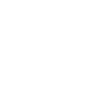

In [38]:
# view training input

index = 11950; img = Float32.(imgs[index, :, :, 2])

# use the ' transpose sign to invert the image

colorview(Gray, img)


In [35]:
# Extract images and labels
imgs = Float32.(dataset["train_images"]); @show imgs[1:4], typeof(imgs);

(imgs[1:4], typeof(imgs)) = (Float32[250.0, 255.0, 185.0, 226.0], Array{Float32, 4})


In [89]:
using Plots, Images

In [131]:
index = 1

1

In [133]:
img = imgs[:,:,:,index]; @show typeof(img[:,:,index]), typeof(img);

(typeof(img[:, :, index]), typeof(img)) = (Matrix{Float32}, Array{Float32, 3})


In [137]:
colorview( Gray, img[:,:,index]);

In [138]:
labels = dataset["train_labels"]; @show lbls[1:4], typeof(lbls), length(labels);

(lbls[1:4], typeof(lbls), length(labels)) = (UInt8[0x07, 0x03, 0x06, 0x06], Matrix{UInt8}, 11959)


In [139]:
nTrain = length(labels)

11959

In [140]:
using BenchmarkTools

In [141]:
@btime trainData = vcat([hcat(float.(imgs[i])...)  for i in 1:nTrain]...);

  2.102 ms (83215 allocations: 2.32 MiB)


In [145]:
@show typeof(trainData), length(trainData)

(typeof(trainData), length(trainData)) = (Matrix{Float64}, 28127568)


(Matrix{Float64}, 28127568)

In [122]:
trainLabels = labels[1:nTrain];

# References
- [ ] [MedMNIST v2 - A large-scale lightweight benchmark
for 2D and 3D biomedical image classification](https://arxiv.org/pdf/2110.14795.pdf)
| Name | Source | Data  Modality | Task (# Classes / Labels) | # Samples | # Training / Validation / Test |
|-|-|-|-|-|-|
| BloodMNIST  | Acevedo et al. |  Blood Cell Microscope | MC (8) | 17,092  | 11,959 / 1,712 / 3,421 |
- [ ] [\[05x08\] Intro to Artificial Neural Networks with Flux.jl (1 of 2); Julia Supervised Machine Learning](https://www.youtube.com/watch?v=zmlulaxatRs)